#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [122]:
# Read CSV
flower = 'https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv'
data_flower = pd.read_csv(flower)
data_flower.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [123]:
data_flower.duplicated().value_counts()

False    147
True       3
dtype: int64

Periksa apakah ada missing values

In [124]:
data_flower.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

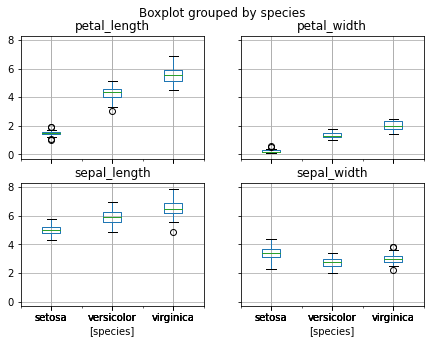

In [125]:
data_flower.boxplot(by='species', figsize=(7, 5))
plt.show()

<AxesSubplot:>

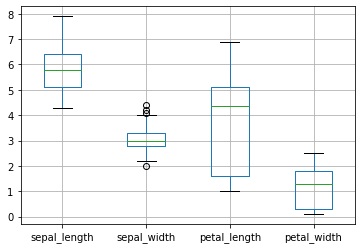

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [126]:
X = data_flower[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = data_flower['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [138]:
logreg = LogisticRegression(random_state=0)
logreg 

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [130]:
y_pred = logreg.fit(scaled_X_train, Y_train).predict(scaled_X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor'], dtype=object)

In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(Y_test,y_pred))
print("Accuracy score: ",(accuracy_score(Y_test,y_pred)))

[[3 0 0]
 [0 8 0]
 [0 0 4]]
Accuracy score:  1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [132]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb

GaussianNB()

Uji hasil model dengan data test

In [133]:
nb.fit(scaled_X_train, Y_train).predict(scaled_X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor'], dtype=object)

Ukur akurasi dari model persamaan Naive Bayes Classifier

In [134]:
print(confusion_matrix(Y_test,y_pred))
print("Accuracy score: ",(accuracy_score(Y_test,y_pred)))

[[3 0 0]
 [0 8 0]
 [0 0 4]]
Accuracy score:  1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [139]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [136]:
knn.fit(scaled_X_train, Y_train).predict(scaled_X_test)

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor'], dtype=object)

Ukur akurasi dari model K-Nearest Neighbor

In [137]:
print(confusion_matrix(Y_test,y_pred))
print("Accuracy score: ",(accuracy_score(Y_test,y_pred)))

[[3 0 0]
 [0 8 0]
 [0 0 4]]
Accuracy score:  1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

menggunakan model yang mana saja, hasil akurasinya sama.